In [ ]:
! MACOSX_DEPLOYMENT_TARGET=14.5 pip install --default-timeout=100 -r requirements2.txt


In [ ]:
local_llm = "llama3"

# deepdoctection

In [ ]:

import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML

import deepdoctection as dd

In [ ]:
import os

def add_empty_line_to_pdf(file_path):
    # Read the original PDF content
    with open(file_path, 'rb') as f:
        content = f.read()

    # Create a temporary file path
    temp_path = "temp_with_empty_line.pdf"

    # Write an empty line followed by the original content
    with open(temp_path, 'wb') as f:
        f.write(b'\n')  # Write an empty line
        f.write(content)  # Append the original content

    return temp_path

# Path to your original PDF
original_path = "pdf/Healthcare_7-Feb-2024.pdf"
# Preprocess the PDF by adding an empty line
preprocessed_path = add_empty_line_to_pdf(original_path)

# Initialize the analyzer
analyzer = dd.get_dd_analyzer()

# Analyze the preprocessed PDF
df = analyzer.analyze(path=preprocessed_path)
df.reset_state()  # This method must be called just before starting the iteration. It is part of the API.

# Clean up the temporary file if needed
os.remove(preprocessed_path)


In [ ]:

doc=iter(df)
page = next(doc)

In [ ]:

page = next(doc)

In [ ]:

image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

In [ ]:

print(page.text)


In [ ]:
table = page.tables[0]
table.get_attribute_names()

HTML(table.html)

In [ ]:
page.save(image_to_json=True, path="/path/to/dir/test.json")


In [ ]:
page = dd.Page.from_file(file_path="/path/to/dir/test.json")

In [ ]:
help(dd.get_dd_analyzer)


In [ ]:
pip install tqdm==4.64.0

In [1]:
import os

os.environ["USE_DD_PILLOW"]="True"
os.environ["USE_DD_OPENCV"]="False"

import deepdoctection as dd
from matplotlib import pyplot as plt
from IPython.core.display import HTML

# Initialize the analyzer with default parameters
analyzer = dd.get_dd_analyzer()

# Function to update configurations
def update_config(component, config_updates):
    for key, value in config_updates.items():
        setattr(component, key, value)

# Configuration updates
config_updates_layout = {
    'weights': 'microsoft/table-transformer-detection/pytorch_model.bin',
    'threshold': 0.6,
}

config_updates_item = {
    'weights': 'microsoft/table-transformer-structure-recognition/pytorch_model.bin',
    'filter': ['table', 'column_header', 'projected_row_header', 'spanning']
}

config_updates_ocr = {
    'use_doctr': False,
    'use_tesseract': True
}

config_updates_text_ordering = {
    'include_residual_text_container': True,
    'paragraph_break': 0.01
}

config_updates_segmentation = {
    'threshold_rows': 0.5,
    'threshold_cols': 0.8,
    'remove_iou_threshold_rows': 0.0005,
    'remove_iou_threshold_cols': 0.00005
}

# Apply configurations for layout and item predictors
update_config(analyzer.pipe_component_list[0].predictor, config_updates_layout)
update_config(analyzer.pipe_component_list[1].predictor, config_updates_item)

# Directly set the required configurations for OCR and text ordering
for key, value in config_updates_ocr.items():
    setattr(analyzer.pipe_component_list[2], key.lower(), value)

for key, value in config_updates_text_ordering.items():
    setattr(analyzer.pipe_component_list[3], key.lower(), value)

# Apply segmentation configurations
for key, value in config_updates_segmentation.items():
    setattr(analyzer, key.lower(), value)

# Print updated configurations
print("Updated configuration for Layout Predictor:", vars(analyzer.pipe_component_list[0].predictor))
print("Updated configuration for Item Predictor:", vars(analyzer.pipe_component_list[1].predictor))
print("Updated configuration for OCR Component:", {k: getattr(analyzer.pipe_component_list[2], k.lower()) for k in config_updates_ocr.keys()})
print("Updated configuration for Text Ordering Component:", {k: getattr(analyzer.pipe_component_list[3], k.lower()) for k in config_updates_text_ordering.keys()})
print("Updated segmentation configuration:", {k: getattr(analyzer, k.lower()) for k in config_updates_segmentation.keys()})


# Path to your PDF file
path = "pdf/Healthcare_7-Feb-2024.pdf"

df = analyzer.analyze(path=path)
df.reset_state()
df_iter = iter(df)



/Users/admin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/admin/Library/Python/3.9/lib/python/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
[0612 11:15.45 @file_utils.py:33]  INF  PyTorch version 2.2.2 available.
[0612 11:15.48 @dd.py:459]  INF  Config: 
 {'DEVICE': device(type='cpu'),
 'LANGUAGE': None,
 'LAYOUT_NMS_PAIRS'

Updated configuration for Layout Predictor: {'filter_categories': None, '_categories_d2': {'0': <LayoutType.text>, '1': <LayoutType.title>, '2': <LayoutType.list>, '3': <LayoutType.table>, '4': <LayoutType.figure>}, '_categories': {'1': <LayoutType.text>, '2': <LayoutType.title>, '3': <LayoutType.list>, '4': <LayoutType.table>, '5': <LayoutType.figure>}, 'path_weights': '/Users/admin/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt', 'path_yaml': '/Users/admin/.cache/deepdoctection/configs/dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml', 'config_overwrite': [], 'device': device(type='cpu'), 'cfg': CfgNode({'VERSION': 2, 'MODEL': CfgNode({'LOAD_PROPOSALS': False, 'MASK_ON': False, 'KEYPOINT_ON': False, 'DEVICE': 'cpu', 'META_ARCHITECTURE': 'GeneralizedRCNN', 'WEIGHTS': '/Users/admin/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt', 'PIXEL_MEAN': [238.234, 238.14, 238.145], 'PIXEL_STD': [7.961, 7.876, 7.81], 'BACKBONE': CfgNode({'NAME': 'build

[0612 11:15.52 @doctectionpipe.py:84]  INF  Processing Healthcare_7-Feb-2024_0.pdf
Syntax Error: Unknown character collection 'PDFTron-Identity'
Syntax Error: Unknown character collection 'PDFTron-Identity'
Syntax Error: Unknown character collection 'PDFTron-Identity'
Syntax Error: Unknown character collection 'PDFTron-Identity'
Syntax Error: Unknown character collection 'PDFTron-Identity'
Syntax Error: Unknown character collection 'PDFTron-Identity'
/Users/admin/Library/Python/3.9/lib/python/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
[0612 11:15.59 @context.py:126]  INF  ImageLayoutService total: 4.8803 sec.
[0612 11:16.02 @context.py:126]  INF  SubImageLayoutService total: 3.9251 sec.
[0612 11:16.05 @conte

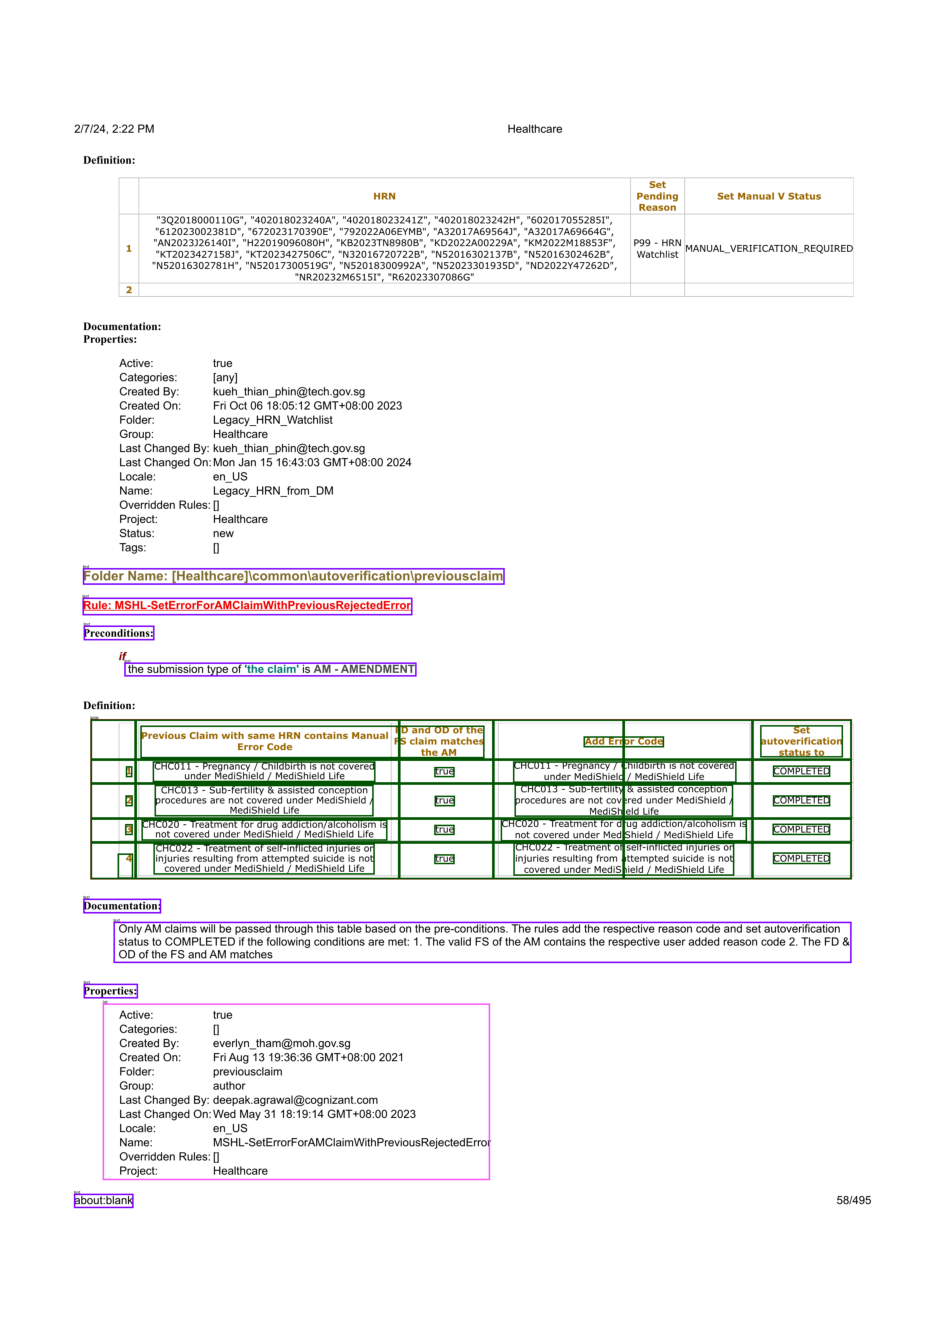

In [2]:
dp = next(df_iter)
np_image = dp.viz()

plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(np_image)

In [5]:

HTML(dp.tables[0].html)

[0612 11:08.10 @view.py:321]  WRN  html construction not possible


# parse and store pdf data in vector stores (ChromaDB)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import GPT4AllEmbeddings
from langchain_community.document_loaders import FireCrawlLoader
from langchain_community.vectorstores.utils import filter_complex_metadata
from langchain.docstore.document import Document

from langchain_community.embeddings.fastembed import FastEmbedEmbeddings


urls = [
    "https://confluence.ship.gov.sg/pages/viewpage.action?pageId=1050239830&preview=%2F1050239830%2F1252494500%2FHealthcare_7-Feb-2024.pdf"
]

docs = ["pdf/Healthcare_7-Feb-2024.pdf"]

#split documents
docs_list = [item for sublist in docs for item in sublist]

#split documents
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1024, chunk_overlap=80, length_function=len, is_separator_regex=False
)

# doc_splits = text_splitter.split_documents(docs_list)

# #Filter out complex metadata and ensure proper document formatting
# filtered_docs = []
# for doc in doc_splits:
#     #ensure the doc is an instance of document and has a 'metadata' attribute
#     if isinstance(doc,Document) and has

# #add to vectorDB
# vectorstore = Chroma.from_documents(
#     documents = doc_splits,
#     collection_name = "rag-chroma",
#     embedding = GPT4AllEmbeddings(),
# )

# retriver = vectorstore.as_retriever()
embedding = FastEmbedEmbeddings()

vector_store = Chroma(persist_directory="db", embedding_function=embedding)

# print("creating chain")
retriever = vector_store.as_retriever(
)




In [ ]:
import pdfplumber
from typing import List

def extract_text_from_pdf(pdf_path: str) -> str:
    with pdfplumber.open(pdf_path) as pdf:
        full_text = ""
        for page in pdf.pages:
            full_text += page.extract_text() + "\n"
    return full_text

# Example usage
pdf_paths = ["pdf/Healthcare_7-Feb-2024.pdf"]
documents = [extract_text_from_pdf(pdf) for pdf in pdf_paths]


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import os
from typing import List


os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# Initialize sentence transformer model for embeddings
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the embedding function
def embed_texts(texts: List[str]) -> np.ndarray:
    return sentence_model.encode(texts, convert_to_numpy=True)

In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Initialize sentence transformer model for embeddings
sentence_model = SentenceTransformer('all-MiniLM-L6-v2')

# Define the embedding function
def embed_texts(texts: List[str]) -> np.ndarray:
    return sentence_model.encode(texts, convert_to_numpy=True)

# Create embeddings for documents
embeddings = embed_texts(documents)

# Save the embeddings and documents for later use
np.save('db/embeddings.npy', embeddings)
with open('db/documents.txt', 'w') as f:
    for doc in documents:
        f.write(doc + "\n")


In [ ]:
import numpy as np
import faiss

# Load the embeddings and documents
embeddings = np.load('db/embeddings.npy')
with open('db/documents.txt', 'r') as f:
    documents = [line.strip() for line in f.readlines()]

# Create embeddings and faiss index
embeddings = embed_texts(documents)
index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)

# Verify Index
print("FAISS Index is_trained:", index.is_trained)
print("FAISS Index total number of vectors:", index.ntotal)

# Verify Document Embeddings
print("Document Embeddings:")
for i, emb in enumerate(embeddings):
    print(f"Document {i} Embedding: {emb}")

# Verify Query Embeddings in hybrid_retrieval function
def hybrid_retrieval(query: str, texts: List[str], index: faiss.Index, top_k: int = 10) -> List[str]:
    query_embedding = embed_texts([query])
    print("Query Embedding:", query_embedding)

    distances, indices = index.search(query_embedding, top_k)
    print("Distances:", distances)
    print("Indices:", indices)

    retrieved_texts = [texts[idx] for idx in indices[0] if idx != -1]
    return retrieved_texts




# Determine relevance

In [ ]:
from langchain.prompts import PromptTemplate
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import JsonOutputParser

#LLM
llm = ChatOllama(model=local_llm, format="json", temperature = 0)

prompt= PromptTemplate(
    template=""" <|begin_of_text|><|start_header_id|>system<|end_header_id|> 
    You are a grader assessing relevance of a retrieved document to a user question. 
    If the document contains keywords related to the user question, grade it as relevant.
    It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    Give a binary score 'yes' or 'no' score to indicate wherther the document is relevant to the question. \n
    Provide the binary score as a JSON with a single key 'score' and no preamble or explanation.
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    Here is the retrieved document: \n\n {document}\n\n
    Here is the user question: {question} \n <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["question","document"],
)

retrieval_grader = prompt | llm | JsonOutputParser()
question = "what the reason behind error code VCA373 and write a playbook to investigate an error"
error_code = "VCA373"
docs = retriever.invoke(question) + retriever.invoke(error_code)

# Debug print statements
print("Retrieved documents:")
print(docs)

for ele in docs:
    print(ele)

# Ensure we have the correct index and document content
if len(docs) > 1:
    doc_text = docs[1]
    print("Document text:")
    print(doc_text)

    # Invoke the grader
    result = retrieval_grader.invoke({"question": question, "document": doc_text})
    print("Grader result:")
    print(result)
else:
    print("Insufficient documents retrieved.")

# Error identifier

In [ ]:
from langchain.prompts import PromptTemplate
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import JsonOutputParser

#LLM
llm = ChatOllama(model=local_llm, format="json", temperature = 0)

prompt= PromptTemplate(
    template=""" <|begin_of_text|><|start_header_id|>system<|end_header_id|> 
    You are an indentifier.
    Identify the error code from the given question / sentence. An example could be VCA373 . Error codes usually start with VCA followed by a few numbers
    It does not need to be a stringent test. The goal is to identify only the error code and return that. \n
    Return the error code if it is present, else return an empty string ''. \n
    Provide the error code as a JSON with a single key 'error_code' and no preamble or explanation.
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    Here is the sentence: \n\n {question}\n\n
    <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["question"],
)

error_identifier = prompt | llm | JsonOutputParser()


def extract_error_code(question):
    error_code_JSON = error_identifier.invoke({"question": question})
    return error_code_JSON["error_code"]

### Document Retrieval and Combination
def retrieve_and_combine_documents(question, retriever, vectore_store):
    error_code = extract_error_code(question)
    combined_docs = []

    if error_code:
        print(f"Extracted Error Code: {error_code}")
        general_docs = retriever.invoke(question)
        error_code_docs = retriever.invoke(error_code)

        # Check for exact match of the error code and prioritize it
        exact_match_docs = [doc for doc in vector_store.search_documents(error_code) if error_code in doc.page_content]

        # Combine documents prioritizing the exact match
        combined_docs = exact_match_docs + [doc for doc in error_code_docs if doc not in exact_match_docs] + [doc for doc in general_docs if doc not in error_code_docs]

    else:
        print("No Error Code found in the question.")
        combined_docs = retriever.invoke(question)

    return combined_docs[:5]


# Usage Example
question = "What is the reason behind error code VCA396?"
combined_docs = retrieve_and_combine_documents(question, retriever, vectore_store)

# Debug print statements
print("Retrieved documents:")
for i in range(0, len(combined_docs)):
    print(f"combined doc {i}: {combined_docs[i].page_content}")

print(question)
print(combined_docs)
generation = rag_chain.invoke({"context": combined_docs, "question": question})
print("Generated Response:")
print(generation)

# Generate answer

In [ ]:
from langchain.prompts import PromptTemplate
from langchain import hub
from langchain_core.output_parsers import StrOutputParser
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from langchain.callbacks.manager import CallbackManager

callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])

prompt= PromptTemplate(
    template=""" <|begin_of_text|><|start_header_id|>system<|end_header_id|> 
    You are an assistant for question-answering tasks. Often, the context might be in code or descriptions, do your best to format it nicely and then analyse them.
    You can try to identify the specific things mentioned in the question and work from there.
    After formatting it nicely into a human readable format, return it at the end in the format "Context: (your formatted context)"
    Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. 
    If you dont know, also mention what you could discern specifically from the context as well as what you think you might need to answer the given question.
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    Question: {question}
    Context: {context}
    Answer: <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["question","context"],
)

llm = ChatOllama(model=local_llm, temperature=0, callbacks=callback_manager)

#chain

rag_chain = prompt | llm | StrOutputParser()

# #run
# question = "What is the reason behind error VCA373"
# docs = retriever.invoke(question)
# generation = rag_chain.invoke({"context": docs, "question": question})
# print(generation)

# Check for hallucination

In [ ]:

llm = ChatOllama(model=local_llm, format="json", temperature=0)

prompt= PromptTemplate(
    template=""" <|begin_of_text|><|start_header_id|>system<|end_header_id|> 
    You are a grader assessing whether an answer is grounded in / supported by a set of facts.
    Give a binary score 'yes' or 'no' score to indicate whether the answer is grounded in / supported by a set of facts.
    Provide the binary score as a JSON with a single ey 'score' and no preamble or explanation.
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    Here are the facts: 
    \n-------\n 
    {documents}
    \n-------\n
    Here is the answer: {generation} <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["generation","document"],
)

hallucination_grader = prompt | llm | JsonOutputParser()
hallucination_grader.invoke({"documents": docs, "generation": generation})


# Answer grader

In [ ]:

llm = ChatOllama(model=local_llm, format="json", temperature=0)

prompt= PromptTemplate(
    template=""" <|begin_of_text|><|start_header_id|>system<|end_header_id|> 
    You are a grader assessing whether an answer is addressing the question properly.
    Give a binary score 'yes' or 'no' score to indicate whether the answer addresses the question well.
    Provide the binary score as a JSON with a single ey 'score' and no preamble or explanation.
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    Question: {question}
    Here is the answer: {generation} <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["generation","question"],
)

answer_grader = prompt | llm | JsonOutputParser()
answer_grader.invoke({"question": question, "generation": generation})


# Lang graph - Setup states & nodes

In [ ]:
from typing_extensions import TypedDict
from typing import List
import time

###state

class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
    """

    question: str
    generation: str
    documents: List[str]
    error_code: str


from langchain.schema import Document

###Nodes

def retrieve(state):
    """
    Retrieve documents from vectorstore

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents

    """
    start_time = time.time()

    print("---RETRIEVE---")
    question = state["question"]

    error_code_JSON = error_identifier.invoke({"question": question})
    error_code = error_code_JSON["error_code"]

    if error_code != '':
        print(f"Extracted Error Code: {error_code}")
        # # Retrieve documents for the general question
        # general_docs = retriever.invoke(question)
        
        # # Retrieve documents specifically for the error code
        # error_code_docs = retriever.invoke(error_code)

        # exact_match_docs1 = [doc for doc in general_docs if error_code in doc.page_content]
        # exact_match_docs2 = [doc for doc in error_code_docs if error_code in doc.page_content]
        # # Combine the results, ensuring error code documents are prioritized or marked
        # # combined_docs = error_code_docs + [doc for doc in general_docs if doc not in error_code_docs]

        # combined_docs = exact_match_docs1 + [doc for doc in general_docs if doc not in exact_match_docs1]

        # print(f"combined_docs: {combined_docs}")
        # print("-------------------------------")
        # print(f"exac 1: {exact_match_docs1}")
        # print("-------------------------------")
        # print(f"gen docs: {general_docs}")
        # print("-------------------------------")
        # print(f"exac 1: {exact_match_docs2}")
        # print("-------------------------------")
        # print(f"errcodedocs: {error_code_docs}")


        with open('db/documents.txt', 'r') as file:
                lines = file.readlines()

        matched_lines = []
        for i, line in enumerate(lines):
            if error_code in line:
                start = max(0, i - 10)
                end = min(len(lines), i + 11)
                matched_lines.extend(lines[start:end])
                
        if matched_lines:
            combined_docs = matched_lines
            print("Exact match found in documents.txt")
            print("-------------------------------")
            print(f"combined_docs: {combined_docs}")




    else:
        print("No Error Code found in the question.")
        # Retrieve documents only for the general question if no error code is found
        combined_docs = retriever.invoke(question)

    elapsed_time = time.time() - start_time
    print(f"Retrieve time: {elapsed_time:.2f} seconds")
    state["retrieve_time"] = elapsed_time
    return {"documents": combined_docs, "question": question, "error_code": error_code}

def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question
    If any document is not relevant, we will ... (TBD)

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Filtered out irrelevant documents
    """
    start_time = time.time()

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    
    question = state["question"]
    documents = state['documents']

    #score each doc
    filtered_docs = []
    for d in documents:
        print(f"doc: {d}")
        score = retrieval_grader.invoke({"question": question, "document": d.page_content})
        grade = score['score']
        #document relevant
        if grade.lower() == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            #then do not include the document in filtered_docs
            continue

    elapsed_time = time.time() - start_time
    print(f"Grade documents time: {elapsed_time:.2f} seconds")
    state["grade_documents_time"] = elapsed_time
    return {"documents": filtered_docs, "question": question}

 
def generate(state):
    """
    Generate answer using RAG on retrieved documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    start_time = time.time()

    print("---GENERATING---")
    question = state["question"]
    documents = state["documents"]

    #RAG generation
    generation = rag_chain.invoke({"context": documents, "question": question})

    elapsed_time = time.time() - start_time
    print(f"Generate time: {elapsed_time:.2f} seconds")
    state["generate_time"] = elapsed_time
    return {"documents": documents, "question": question, "generation": generation}


def grade_generation_v_documents_and_question(state):
    """

    """
    start_time = time.time()
    print("---CHECK HALLUCINATION---")
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]

    score = hallucination_grader.invoke({"documents": documents, "generation": generation})
    grade = score['score']

    #check hallucination
    if grade == "yes":
        print("--DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        #check question-answering
        print("---GRADE GENERATION VS QUESTION---")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score['score']
        if grade == "yes":
            print("--DECISION: GENERATION ADDRESSES QUESTION---")
            elapsed_time = time.time() - start_time
            print(f"Grade generation time: {elapsed_time:.2f} seconds")
            state["grade_generation_time"] = elapsed_time
            return "useful"
        else:
            print("--DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
            elapsed_time = time.time() - start_time
            print(f"Grade generation time: {elapsed_time:.2f} seconds")
            state["grade_generation_time"] = elapsed_time
            return "not useful"

    else:
        print("--DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        elapsed_time = time.time() - start_time
        print(f"Grade generation time: {elapsed_time:.2f} seconds")
        state["grade_generation_time"] = elapsed_time
        return "not supported"


from langgraph.graph import END, StateGraph
workflow = StateGraph(GraphState)

#define nodes
workflow.add_node("retrieve", retrieve)
# workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)

In [ ]:
#build graph
workflow.set_entry_point("retrieve")
# workflow.add_edge("retrieve", "grade_documents")
workflow.add_edge("retrieve", "generate")
# workflow.add_edge("grade_documents", "generate")

# workflow.add_conditional_edges(
#     "generate",
#     grade_generation_v_documents_and_question,
#     {
#         "not supported": "generate",
#         "useful": END,
#         # "not useful"
#     },
# )
workflow.add_edge("generate", END)


In [ ]:
#compile
app = workflow.compile()

#Test
from pprint import pprint
inputs = {"question": "What is the reason behind error code VCA373. Come up with a play book to invstigate this"}
for output in app.stream(inputs):
    for key, value in output.items():
        pprint(f"Finished running: {key}:")

print(value["generation"])

In [ ]:
import gradio as gr
import io
import contextlib
import sys
from typing import Any, Dict
import time

app = workflow.compile()

### Gradio Chat Interface Integration

### ChatInterface function with streaming for generation output
def chat_predict(message, history, state):
    try:
        start_time = time.time()
        inputs = {"question": message}
        full_output = ""
        state = {"generation": ""}

        for output in app.stream(inputs):
            for key, value in output.items():
                if key == "generation":
                    full_output += value['generation'] + "\n"
                    state["generation"] += value['generation'] + "\n"
                    current_time = time.time() - start_time
                    yield full_output + f"Running time: {current_time:.2f} seconds\n"
        
        total_time = time.time() - start_time
        yield full_output + f"Total time: {total_time:.2f} seconds\n + {state['generation']}"
    except Exception as e:
        yield str(e)

### Combine the interfaces
chat_interface = gr.ChatInterface(
    fn=chat_predict,
    title="Ask Question",
    # inputs=["text", "state"],
    # outputs="text",
    # state="state"
)

### Launch the Gradio app
chat_interface.launch()